In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
import glob
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize




reading NS_pr_restart_0.npz
reading NS_pr_restart_1000.npz
reading NS_pr_restart_2000.npz
reading NS_pr_restart_3000.npz
reading NS_pr_restart_4000.npz
reading NS_pr_restart_5000.npz
reading NS_pr_restart_6000.npz
reading NS_pr_restart_7000.npz
reading NS_pr_restart_8000.npz
reading NS_pr_restart_9000.npz
reading NS_pr_restart_10000.npz
reading NS_pr_restart_11000.npz
reading NS_pr_restart_12000.npz
reading NS_pr_restart_13000.npz
reading NS_pr_restart_14000.npz
reading NS_pr_restart_15000.npz
reading NS_pr_restart_16000.npz
reading NS_pr_restart_17000.npz
reading NS_pr_restart_18000.npz
reading NS_pr_restart_19000.npz
reading NS_pr_restart_20000.npz
reading NS_pr_restart_21000.npz
reading NS_pr_restart_22000.npz
reading NS_pr_restart_23000.npz
reading NS_pr_restart_24000.npz
reading NS_pr_restart_25000.npz
reading NS_pr_restart_26000.npz
reading NS_pr_restart_27000.npz
reading NS_pr_restart_28000.npz
reading NS_pr_restart_29000.npz
reading NS_pr_restart_30000.npz
reading NS_pr_restart

/var/folders/3q/t3cczp251wx1rmlq6xtwc2t00000gn/T/ipykernel_22655/2186591092.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


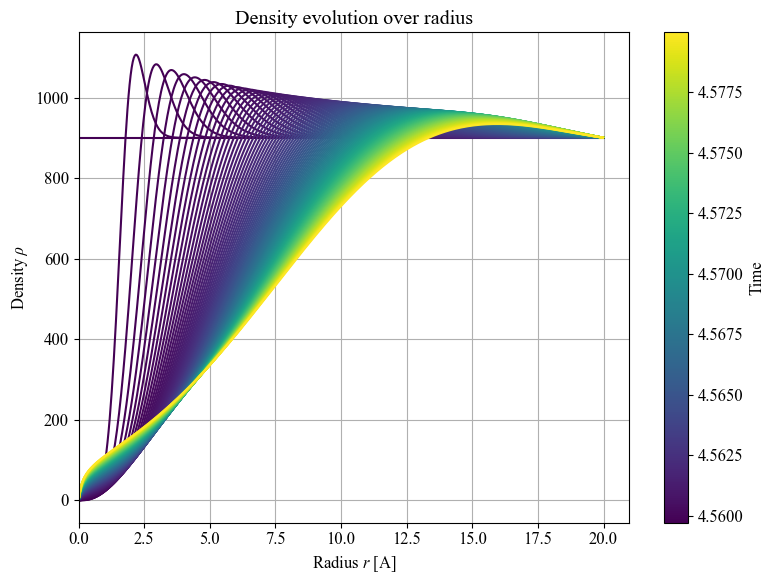

/var/folders/3q/t3cczp251wx1rmlq6xtwc2t00000gn/T/ipykernel_22655/2186591092.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


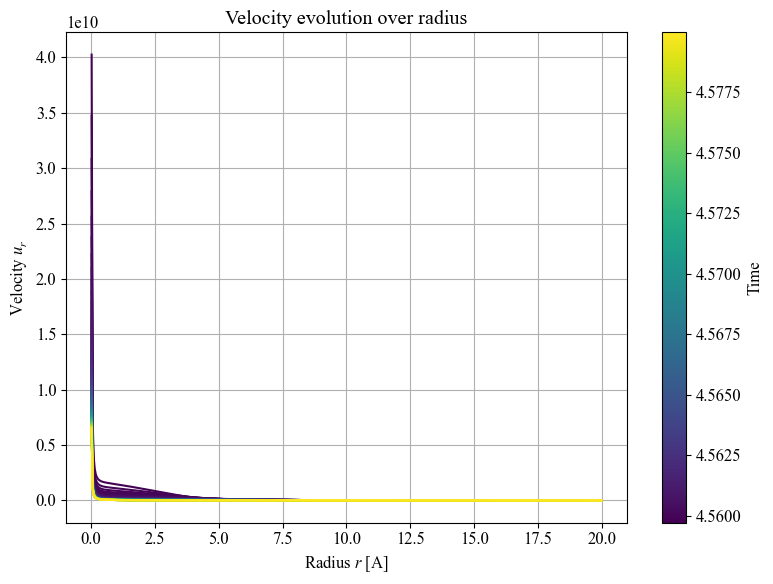

/var/folders/3q/t3cczp251wx1rmlq6xtwc2t00000gn/T/ipykernel_22655/2186591092.py:102: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


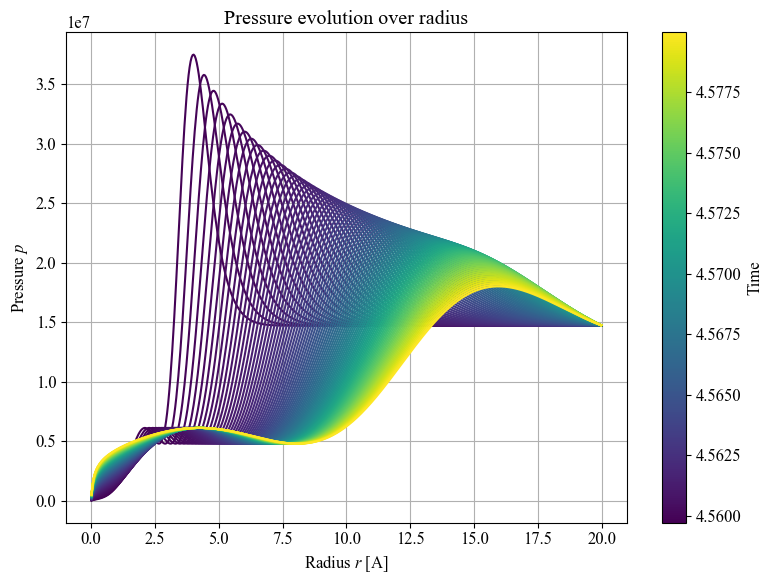

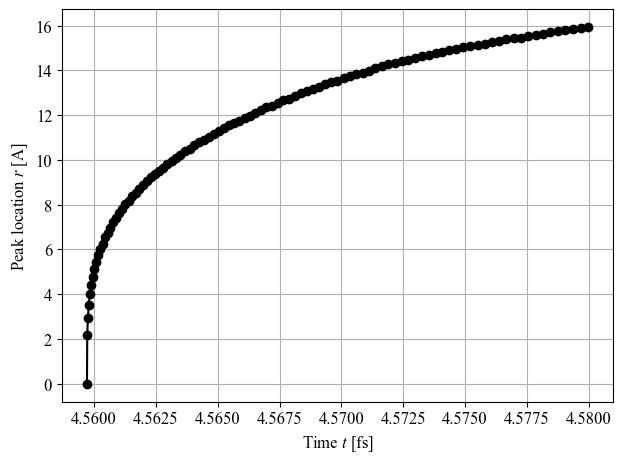

In [120]:
# Read .npz file
def read_npz(filepath):
    """
    Read a .npz file and return its contents.
    
    Args:
        filepath: Path to the .npz file
        
    Returns:
        Dictionary-like object containing arrays stored in the .npz file
    """
    data = np.load(filepath)
    return data

# Example: Read one of the restart files
N_data = 99; time_step_interval = 1000
density_data = []
velocity_data = []
pressure_data = []
r_data = []
fr_data = []
time_data = []
data_files = []
for i in range(0,N_data):
    print(f"reading NS_pr_restart_{i*time_step_interval}.npz")
    data = read_npz(f'CO2_147bar_{i*time_step_interval}.npz')
    density_data.append(data['rho'])
    velocity_data.append(data['ur'])
    pressure_data.append(data['p'])
    r_data = data['r']
    fr_data = data['fr']
    time_data.append(data['time'])

density_data = np.array(density_data)
velocity_data = np.array(velocity_data)
pressure_data = np.array(pressure_data)
time_data = np.array(time_data)*10**15

peak_location = []
for i in range(N_data):
    peak_location.append(r_data[np.argmax(density_data[i, :])])
peak_location = np.array(peak_location)
peak_location[0] = 0.0

# --- Plot ---
# Set font to Times New Roman with size 20
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Set math font to Times New Roman as well
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
fig, ax = plt.subplots(figsize=(8,6))
cmap = get_cmap('viridis')
norm = Normalize(vmin=np.min(time_data), vmax=np.max(time_data))

for i, t in enumerate(time_data):
    color = cmap(norm(t))
    ax.plot(r_data*10**10, density_data[i, :], color=color, label=f't={t:.2f}')
# Colorbar needs a "mappable" and a target Axes
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # required by older Matplotlib paths

cbar = fig.colorbar(sm, ax=ax)  # <-- specify ax (or use plt.colorbar(sm, ax=ax))
cbar.set_label('Time')

ax.set_xlabel(r'Radius $r$ [A]')
ax.set_ylabel(r'Density $\rho$')
plt.grid(True)
ax.set_xlim(0, )
ax.set_title('Density evolution over radius')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
cmap = get_cmap('viridis')
norm = Normalize(vmin=np.min(time_data), vmax=np.max(time_data))
for i, t in enumerate(time_data):
    if i == 0 or i == 1 or i == 2 or i ==3:
        continue
    color = cmap(norm(t))
    ax.plot(r_data*10**10, velocity_data[i, :], color=color, label=f't={t:.2f}')
# Colorbar needs a "mappable" and a target Axes
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # required by older Matplotlib paths

cbar = fig.colorbar(sm, ax=ax)  # <-- specify ax (or use plt.colorbar(sm, ax=ax))
cbar.set_label('Time')

ax.set_xlabel(r'Radius $r$ [A]')
ax.set_ylabel(r'Velocity $u_r$')
plt.grid(True)
# ax.set_ylim(0, 0.75e10)
# ax.set_xlim(0, 7.5)
ax.set_title('Velocity evolution over radius')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
cmap = get_cmap('viridis')
norm = Normalize(vmin=np.min(time_data), vmax=np.max(time_data))
for i, t in enumerate(time_data):
    if i == 0 or i == 1 or i == 2 or i ==3:
        continue
    color = cmap(norm(t))
    ax.plot(r_data*10**10, pressure_data[i, :], color=color, label=f't={t:.2f}')
# Colorbar needs a "mappable" and a target Axes
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # required by older Matplotlib paths

cbar = fig.colorbar(sm, ax=ax)  # <-- specify ax (or use plt.colorbar(sm, ax=ax))
cbar.set_label('Time')

ax.set_xlabel(r'Radius $r$ [A]')
ax.set_ylabel(r'Pressure $p$')
plt.grid(True)
# ax.set_ylim(0, 0.75e10)
# ax.set_xlim(0, 7.5)
ax.set_title('Pressure evolution over radius')
fig.tight_layout()
plt.show()

plt.plot(time_data, peak_location*1e10,'ko-')
plt.xlabel(r'Time $t$ [fs]')
plt.ylabel(r'Peak location $r$ [A]')
plt.grid(True)
plt.tight_layout()
plt.show()



0.0


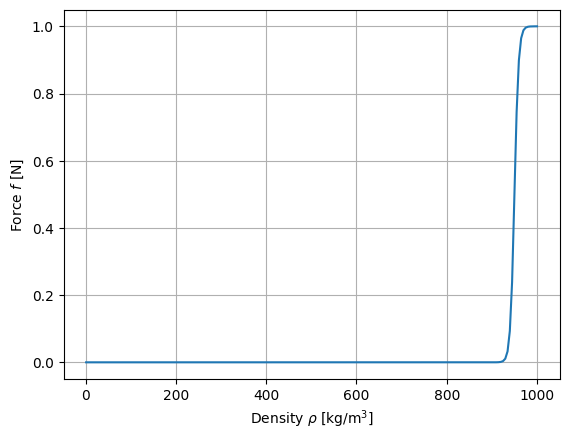

In [39]:
r = np.linspace(1.0,1000.0,200)
r_low = 100.0
r_high = 1000.0
r_middle =950.0#(r_low + r_high)/2.0
r_norm = (r - r_low)/(r_high - r_low)
r_norm_middle = (r_middle - r_low)/(r_high - r_low)
force = 0.5*(1.0+np.tanh((r_norm - r_norm_middle)/0.01))
print(force[0])
plt.plot(r,force)
plt.xlabel(r'Density $\rho$ [kg/m$^3$]')
plt.ylabel(r'Force $f$ [N]')
plt.grid(True)
plt.show()


In [40]:
R = 8.31446261815324
T = 298.15
M = 18.0e-3
R_gas = R/M
p = 1e5
rho = p/R_gas/T
print(rho)



0.7261118198118628
